<a href="https://colab.research.google.com/github/caole26/caole26/blob/main/KMeans_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install additional packages if necessary
!pip install matplotlib seaborn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


<ipython-input-2-fdb54d7baf34>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')


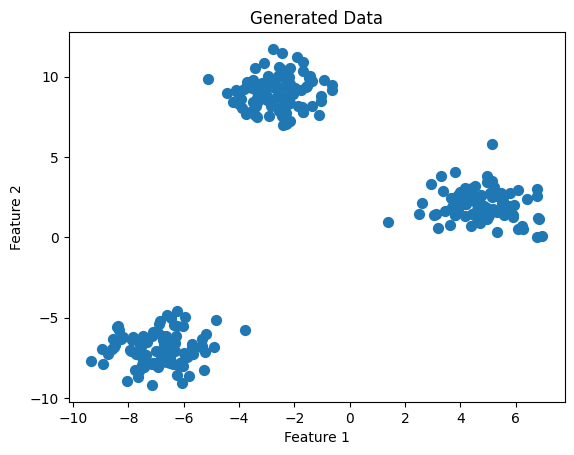

In [2]:
# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, labels_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=1.0, random_state=random_state)

# Visualize the raw data
plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


In [4]:
# Apply K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=random_state)
kmeans.fit(data_normalized)

# Get clustering results
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print cluster centroids
print("Cluster Centroids (normalized):\n", centroids)

Cluster Centroids (normalized):
 [[-0.21277029  1.15926337]
 [-1.07970061 -1.25787405]
 [ 1.2924709   0.09861068]]


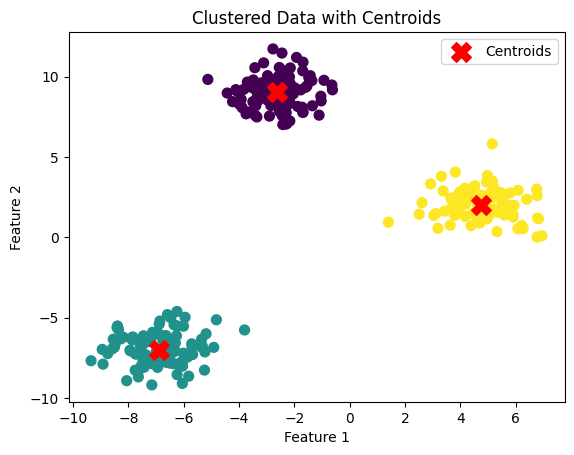

In [5]:
# Plot clustered data
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(centroids[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            centroids[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("Clustered Data with Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(data_normalized, clusters)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette:.2f}")


Inertia: 18.26315933089595
Silhouette Score: 0.85


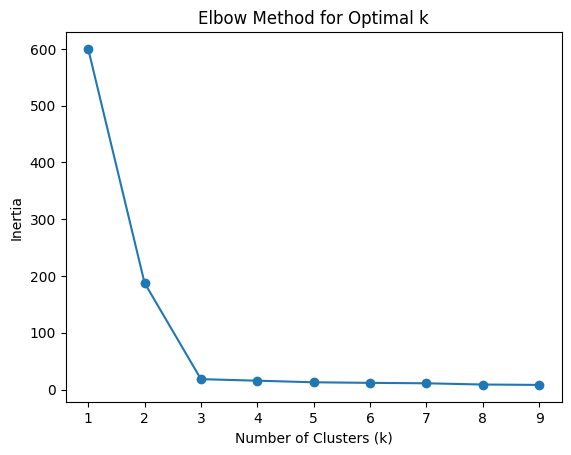

In [7]:
# Determine optimal k using elbow method
inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(data_normalized)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()
